https://medium.com/@ronoysarkar/predicting-house-price-index-with-ridge-regression-and-hyperparameter-optimization-5bd715646cdb

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('./Housing_Macroeconomic_Factors_US (2).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               425 non-null    object 
 1   house_price_index  425 non-null    float64
 2   population         425 non-null    int64  
 3   house_supply       425 non-null    float64
 4   gdp                422 non-null    float64
 5   mortgage_rate      422 non-null    float64
 6   employment_rate    422 non-null    float64
 7   permit_new         422 non-null    float64
 8   ppi_res            422 non-null    float64
 9   m3                 422 non-null    float64
 10  cci                422 non-null    float64
 11  delinquency_rate   374 non-null    float64
 12  hcai               285 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.3+ KB


<AxesSubplot: >

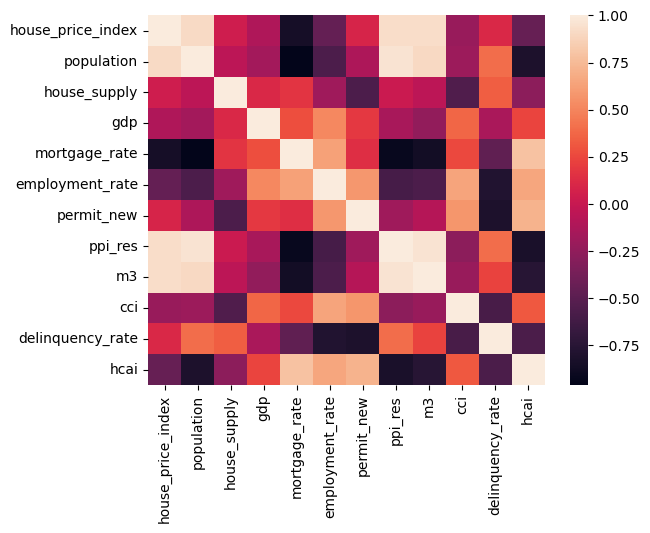

In [2]:
sns.heatmap(data.corr())

<AxesSubplot: xlabel='ppi_res', ylabel='m3'>

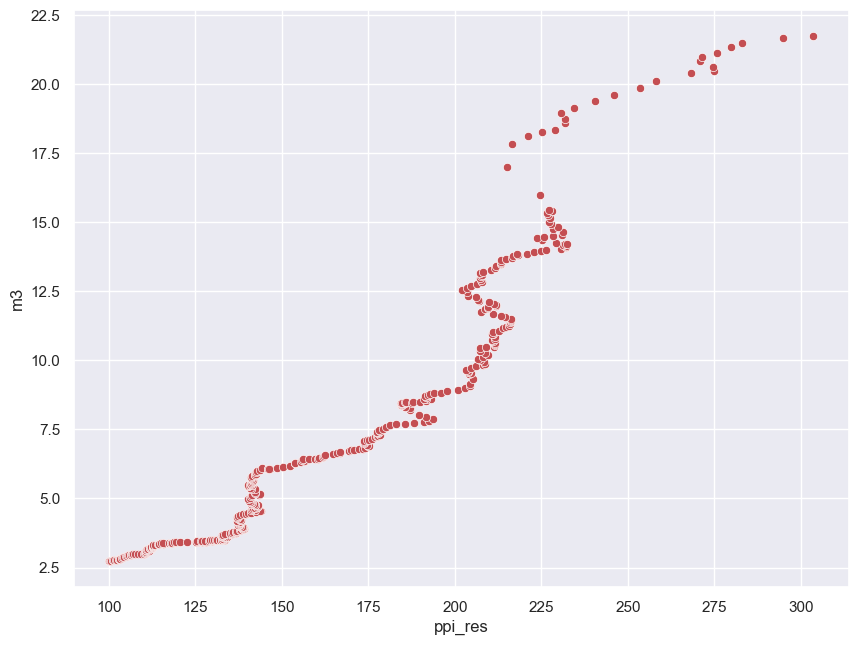

In [3]:
sns.set(rc = {'figure.figsize':(10,7.5)})
sns.scatterplot(x='ppi_res', y='m3', data=data, color='r')

In [6]:
clean = data.drop('Date',axis=1)
clean = clean.drop('delinquency_rate',axis=1)
clean = clean.drop('hcai',axis=1)
clean = clean.drop(data.index[[422, 423, 424]])

X = clean.drop('house_price_index',axis=1)
y = clean['house_price_index']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60 )

In [7]:
from sklearn.linear_model import Ridge 
lr = Ridge()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)

lr.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [10]:

from sklearn.model_selection import GridSearchCV

grid = {'alpha': [0, 1, 10, 100, 1000],
 'fit_intercept': [True, False],
 'max_iter': [1000, 5000, 10000, 15000],
 'solver': ['auto', 'svd', 'cholesky'],
 'tol': [0.001, .0001, .00001]
}

gridsearch = GridSearchCV(
    estimator = lr,
    param_grid = grid,
    cv = 10,
    verbose = 1
)
print(gridsearch)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 5000, 10000, 15000],
                         'solver': ['auto', 'svd', 'cholesky'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=1)


In [11]:
olr = Ridge(alpha=10,fit_intercept = True,max_iter = 1000, solver = 'auto', tol=0.001)
olr.fit(X_train, y_train)

y_pred=olr.predict(X_test)

0.9841887483775549


Text(0, 0.5, 'Actual House Price Index')

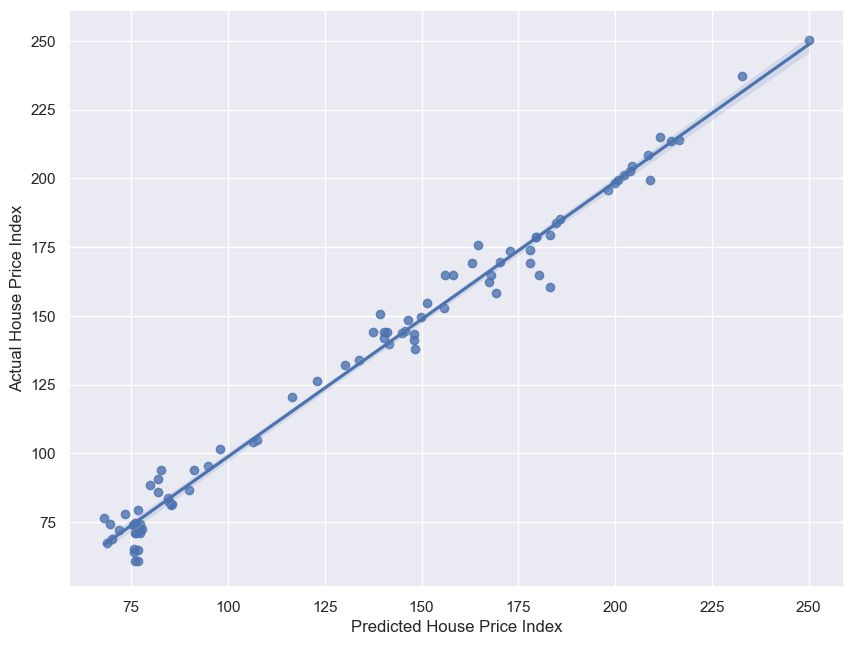

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

plot = sns.regplot(x=y_test, y = y_pred, data = data)
plot.set_xlabel("Predicted House Price Index")
plot.set_ylabel("Actual House Price Index")